# ELE435/535 Lab 3

### Due Date: 10/07/2019 (Mon) 11:59 PM
### Name: Minh-Thi Nguyen


# Getting Started with Scikit-Learn

## 1) Iris flowers dataset

Scikit-learn includes some well-known datasets, one of which is the Iris flowers dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set). It contains 4 attributes (petal length and width, sepal length and width) about Iris flower species ("Setosa", "Versicolor", or "Virginica"). We would like to predict the Iris species based on the attribute measures. 


### 1.1) Import required Python packages:

In [2]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

%matplotlib inline 

### 1.2) Import Iris dataset:

In [3]:
from sklearn import datasets
Iris_data = datasets.load_iris()
data_X = Iris_data.data #Data matrix
data_labels = Iris_data.target #Data labels

### 1.3) Print the size of data array (data_X). How many labels exist in the dataset? How many features does each Iris sample have? Hint: You can use X.shape command.

In [4]:
print(data_X.shape)
print(data_labels.size)
print("There are 150 labels and 4 features for each sample.")

(150, 4)
150
There are 150 labels and 4 features for each sample.


In [5]:
print(data_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 1.4) Now, split the data into training/test sets using "train_test_split" command in scikit-learn. Consider 80% of the data to be training and the rest as the test data. The "train_test_split" is a class in the model_selection subpackage of scikit_learn.

In [6]:
from sklearn.model_selection import train_test_split
data_train, data_test, data_labels_train, data_labels_test = train_test_split(data_X, data_labels, test_size = 0.2, random_state = 0)
print(data_test.shape)
print(data_train.shape)

(30, 4)
(120, 4)


### 1.5) What does "random_state" argument of "train_test_split" command do? Why would it be useful?

In [7]:
print("The random_state argument, if it is an integer argument, indicates the seed used by the random number generator, while if there is no indicated argument, the split will be generated by the np.random state instance.")
print("The seed indicates the point where the random number sequence is generated.")
print("The random seed that we specify for the split between the train and test data is useful because the split in the data becomes deterministic after setting the seed for the data, which can influence the results based on what the set for the train and test data is chosen to be.")

The random_state argument, if it is an integer argument, indicates the seed used by the random number generator, while if there is no indicated argument, the split will be generated by the np.random state instance.
The seed indicates the point where the random number sequence is generated.
The random seed that we specify for the split between the train and test data is useful because the split in the data becomes deterministic after setting the seed for the data, which can influence the results based on what the set for the train and test data is chosen to be.


### 1.6) Select only the first two features for both training and test data. Then, plot how training and test data are distributed in two dimensions. Use different colors for instances from different classes. Hint: "plt.scatter" will be helpful.

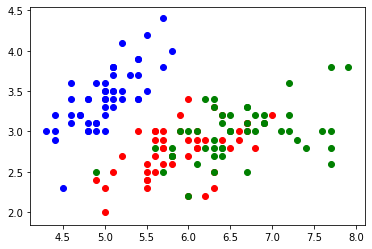

In [16]:
# select only the first two features for both training and test data 
data_train_new = np.zeros((120,2))
data_train_new = data_train[:,0:2]

data_test_new = np.zeros((30,2))
data_test_new = data_test[:,0:2]

firstclass_index_train = np.where(data_labels_train == 0)
secondclass_index_train = np.where(data_labels_train == 1)
thirdclass_index_train = np.where(data_labels_train == 2)

firstclass_index_test = np.where(data_labels_test == 0)
secondclass_index_test = np.where(data_labels_test == 1)
thirdclass_index_test = np.where(data_labels_test ==2)

plt.scatter(data_train_new[firstclass_index_train,0], data_train_new[firstclass_index_train,1], marker = 'o', c="blue")
plt.scatter(data_test_new[firstclass_index_test,0], data_test_new[firstclass_index_test,1], marker = 'o', c="blue")

plt.scatter(data_train_new[secondclass_index_train,0], data_train_new[secondclass_index_train,1], marker = 'o', c="red")
plt.scatter(data_test_new[secondclass_index_test,0], data_test_new[secondclass_index_test,1], marker = 'o', c="red")

plt.scatter(data_train_new[thirdclass_index_train,0], data_train_new[thirdclass_index_train,1], marker = 'o', c="green")
plt.scatter(data_test_new[thirdclass_index_test,0], data_test_new[thirdclass_index_test,1], marker = 'o', c="green")

### 1.7) Dataset standardization: Scale each feature across training data to have zero mean and unit variance using numpy. (For the training data with 4 features). Hint: You may use np.mean(), and np.std() command. Make sure that you compute mean across the correct axis.

### Use these results to standardize the test set using the computed training mean and variace.

In [17]:
# scale each feature across training data to have zero mean and unit variance using numpy 
# data_train

# remove the mean value from each feature 
# scale data by dividing non-constant features by standard deviation

new_train_data = np.zeros((120,4))

new_train_data[:,0] = data_train[:,0] - np.mean(data_train[:,0])
new_train_data[:,0] = new_train_data[:,0]/np.std(new_train_data[:,0])
print(np.mean(new_train_data[:,0]))
print(np.std(new_train_data[:,0]))

new_train_data[:,1] = data_train[:,1] - np.mean(data_train[:,1])
new_train_data[:,1] = new_train_data[:,1]/np.std(new_train_data[:,1])
print(np.mean(new_train_data[:,1]))
print(np.std(new_train_data[:,1]))

new_train_data[:,2] = data_train[:,2] - np.mean(data_train[:,2])
new_train_data[:,2] = new_train_data[:,2]/np.std(new_train_data[:,2])
print(np.mean(new_train_data[:,2]))
print(np.std(new_train_data[:,2]))

new_train_data[:,3] = data_train[:,3] - np.mean(data_train[:,3])
new_train_data[:,3] = new_train_data[:,3]/np.std(new_train_data[:,3])
print(np.mean(new_train_data[:,3]))
print(np.std(new_train_data[:,3]))

3.7007434154171884e-18
0.9999999999999999
2.4794980883295163e-16
0.9999999999999999
1.9984014443252818e-16
0.9999999999999999
2.183438615096141e-16
1.0


In [18]:
# standardize the test data using train mean and std
new_test_data = np.zeros((30,4))

new_test_data[:,0] = data_test[:,0] - np.mean(data_train[:,0])
new_test_data[:,0] = data_test[:,0]/np.std(data_train[:,0])
print(np.mean(new_test_data[:,0]))
print(np.std(new_test_data[:,0]))

new_test_data[:,1] = data_test[:,1] - np.mean(data_train[:,1])
new_test_data[:,1] = data_test[:,1]/np.std(data_train[:,1])
print(np.mean(new_test_data[:,1]))
print(np.std(new_test_data[:,1]))

new_test_data[:,2] = data_test[:,2] - np.mean(data_train[:,2])
new_test_data[:,2] = data_test[:,2]/np.std(data_train[:,2])
print(np.mean(new_test_data[:,2]))
print(np.std(new_test_data[:,2]))

new_test_data[:,3] = data_test[:,3] - np.mean(data_train[:,3])
new_test_data[:,3] = data_test[:,3]/np.std(data_train[:,3])
print(np.mean(new_test_data[:,3]))
print(np.std(new_test_data[:,3]))

6.722667554731833
0.8421174935967924
7.1455694463405255
1.048296170150389
1.9841145224920709
0.9369143240810831
1.38580123674763
0.8973937073614139


### 1.8) Now, perform dataset standardization using Scikit-learn. Hint: You may find "StandardScalar" class from "preprocessing" sub-package of scikit learn helpful.

In [19]:
from sklearn import preprocessing

#standardize the train data
standardized_train = preprocessing.scale(data_train)
print(np.mean(standardized_train[:,0]))
print(np.std(standardized_train[:,0]))
print(np.mean(standardized_train[:,1]))
print(np.std(standardized_train[:,1]))
print(np.mean(standardized_train[:,2]))
print(np.std(standardized_train[:,2]))
print(np.mean(standardized_train[:,3]))
print(np.std(standardized_train[:,3]))

#standardize the test data
standardized_test = preprocessing.scale(data_test)
print(np.mean(standardized_test[:,0]))
print(np.std(standardized_test[:,0]))
print(np.mean(standardized_test[:,1]))
print(np.std(standardized_test[:,1]))
print(np.mean(standardized_test[:,2]))
print(np.std(standardized_test[:,2]))
print(np.mean(standardized_test[:,3]))
print(np.std(standardized_test[:,3]))

#standardize the whole data
standardized_X = preprocessing.scale(data_X)

1.4802973661668754e-17
1.0
-8.030613211455299e-16
0.9999999999999998
4.477899532654798e-16
1.0000000000000002
2.905083581102493e-16
1.0
1.1398289719484941e-15
1.0
4.070817756958907e-17
1.0
-6.513308411134251e-16
1.0000000000000002
-1.1472304587793285e-16
0.9999999999999999


### 1.9) PCA with scikit-learn: Project the standardized data (with 4 features) onto the span of the first two principal components. Hint: you may use PCA command from scikit_learn.

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

PC_standard_train = pca.fit_transform(standardized_train)
PC_standard_test = pca.fit_transform(standardized_test)


### 1.10) Visualize the projected training data and test data in two dimensions (use the same colors as the ones used in step 6).

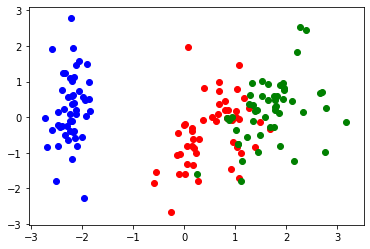

In [21]:
plt.scatter(PC_standard_train[firstclass_index_train,0], PC_standard_train[firstclass_index_train,1], marker = 'o', c="blue")
plt.scatter(PC_standard_test[firstclass_index_test,0], PC_standard_test[firstclass_index_test,1], marker = 'o', c="blue")

plt.scatter(PC_standard_train[secondclass_index_train,0], PC_standard_train[secondclass_index_train,1], marker = 'o', c="red")
plt.scatter(PC_standard_test[secondclass_index_test,0], PC_standard_test[secondclass_index_test,1], marker = 'o', c="red")

plt.scatter(PC_standard_train[thirdclass_index_train,0], PC_standard_train[thirdclass_index_train,1], marker = 'o', c="green")
plt.scatter(PC_standard_test[thirdclass_index_test,0], PC_standard_test[thirdclass_index_test,1], marker = 'o', c="green")

## 2) Implementing Different Classifiers on the Iris flowers dataset

### 2.1) K-Nearest Neighbor Classifier

Implement k nearest clasifier using scikit-learn for k=1,2,...,10. Hint: you will find http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
 helpful. 
        
Plot training accuracy versus k. Plot test accuracy versus k.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracies = np.zeros(10)
test_accuracies = np.zeros(10)

for k in range(10):
    k_classify = k+1
    
    #create knn classifier 
    knn = KNeighborsClassifier(n_neighbors = k_classify)
    
    #training data fit model
    knn.fit(data_train, data_labels_train)
    
    #compute the accuracy of training 
    training_accuracies[k] = knn.score(data_train, data_labels_train)
    test_accuracies[k] = knn.score(data_test, data_labels_test)

k_vector = np.arange(1,11,1)

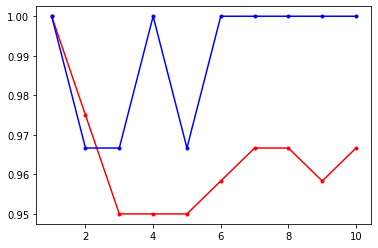

In [25]:
plt.plot(k_vector, training_accuracies, 'r.-')
plt.plot(k_vector, test_accuracies, 'b.-')

### 2.2) Nearest Class-Mean Classifier:

Implement nearest mean classifier and report the training and test accuracies. Hint: You will find the following link helpful: http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [91]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

In [93]:
nc = NearestCentroid()
nc.fit(data_train, data_labels_train)

training_accuracies = nc.score(data_train, data_labels_train)
test_accuracies = nc.score(data_test, data_labels_test)

print(training_accuracies)
print(test_accuracies)


0.9416666666666667
0.9


### 2.3) Gaussian Naive Bayes:

Implement Gaussian Naive Bayes classifier using scikit-learn and report the training and test accuracies. Hint: You will find http://scikit-learn.org/stable/modules/naive_bayes.html helpful.

In [98]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(data_train, data_labels_train)

training_accuracies = gnb.score(data_train, data_labels_train)
test_accuracies = gnb.score(data_test, data_labels_test)

print(training_accuracies)
print(test_accuracies)

0.95
0.9666666666666667


## 3) The MNIST Dataset

### 3.1) K-Nearest Neighbor Classifier:
Implement k-nearest neighbor classifer for MNIST dataset where k = 1, 2, 3 (use the files that were given for HW1). You will use scikit-learn for this part but make sure that the data has the format that scikit-learn expects (training samples are in rows of the training matrix not in columns). Plot training and test accuracies versus k. (It takes a while to run this part)  http://scikit-learn.org/stable/modules/generate/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

In [39]:
train_data = np.load('MNISTcwtrain1000.npy')
train_data = train_data.astype(dtype='uint8')
test_data = np.load('MNISTcwtest100.npy')
test_data = test_data.astype(dtype='uint8')

train_data = train_data.T
test_data = test_data.T

In [28]:
print(train_data.shape)
print(test_data.shape)

(10000, 784)
(1000, 784)


In [29]:
#labels
#training: first 1000 are digits 0, next 1000 are digits 1, etc. 
training_labels = np.zeros((10000))
for i in range(10):
    training_labels[i*1000:(i+1)*1000] = i
#test: first 100 are digits 0, next 100 are digits 1, etc. 
test_labels = np.zeros((1000))
for j in range(10):
    test_labels[j*100:(j+1)*100] = j

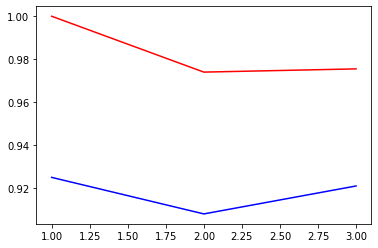

In [30]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracies = np.zeros(3)
test_accuracies = np.zeros(3)

for k in range(3):
    k_classify = k+1
    
    #create knn classifier 
    knn = KNeighborsClassifier(n_neighbors = k_classify)
    
    #training data fit model
    knn.fit(train_data, training_labels)
    
    #compute the accuracy of training 
    training_accuracies[k] = knn.score(train_data, training_labels)
    test_accuracies[k] = knn.score(test_data, test_labels)

k_vector = np.arange(1,4,1)

plt.plot(k_vector, training_accuracies, 'r-')
plt.plot(k_vector, test_accuracies, 'b-')

### 3.2) Nearest Class-Mean Classifier:

Implement nearest class mean classifier and report the training and test accuracies (using scikit-learn). http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

In [31]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

nc = NearestCentroid()
nc.fit(train_data, training_labels)

training_accuracies = nc.score(train_data, training_labels)
test_accuracies = nc.score(test_data, test_labels)

print(training_accuracies)
print(test_accuracies)

0.8038
0.767


### 3.3) Gaussian Naive Bayes Classifier:

Implement Gaussian naive Bayes classifer and report the training and test accuracies. (http://scikit-learn.org/stable/modules/naive_bayes.html)

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_data, training_labels)

training_accuracies = gnb.score(train_data, training_labels)
test_accuracies = gnb.score(test_data, test_labels)

print(training_accuracies)
print(test_accuracies)

0.588
0.549


### 3.4) PCA with scikit-learn:

Project the training data onto the span of first two principal components. Then visualize how the projected data is distributed in two dimensions. Use different colors for different digits.

In [40]:
from sklearn.decomposition import PCA

standardized_train = preprocessing.scale(train_data)
standardized_train = preprocessing.scale(test_data)

pca = PCA(n_components=2)

PC_standard_train = pca.fit_transform(standardized_train)
PC_standard_test = pca.fit_transform(standardized_test)

IndexError: index 30 is out of bounds for axis 0 with size 30

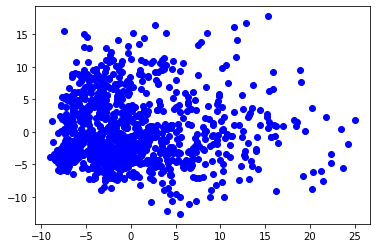

In [34]:
#plot
plt.scatter(PC_standard_train[np.where(training_labels==0),0],PC_standard_train[np.where(training_labels==0),1], marker = 'o', c="blue")
plt.scatter(PC_standard_test[np.where(training_labels==0),0], PC_standard_test[np.where(training_labels==0),1], marker = 'o', c="blue")

In [36]:
np.where(test_labels==0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)

In [38]:
PC_standard_test.shape

(30, 2)

IndexError: index 30 is out of bounds for axis 0 with size 30

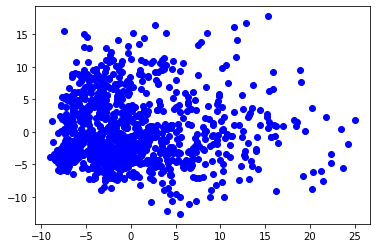

In [35]:
#plot
plt.scatter(PC_standard_train[np.where(training_labels==0),0],PC_standard_train[np.where(training_labels==0),1], marker = 'o', c="blue")
plt.scatter(PC_standard_test[np.where(test_labels==0),0], PC_standard_test[np.where(test_labels==0),1], marker = 'o', c="blue")

plt.scatter(PC_standard_train[np.where(training_labels==1),0],PC_standard_train[np.where(training_labels==1),1], marker = 'o', c="red")
plt.scatter(PC_standard_test[np.where(test_labels==1),0], PC_standard_test[np.where(test_labels==1),1], marker = 'o', c="red")

plt.scatter(PC_standard_train[np.where(training_labels==2),0],PC_standard_train[np.where(training_labels==2),1], marker = 'o', c="green")
plt.scatter(PC_standard_test[np.where(test_labels==2),0], PC_standard_test[np.where(test_labels==2),1], marker = 'o', c="green")

plt.scatter(PC_standard_train[np.where(training_labels==3),0],PC_standard_train[np.where(training_labels==3),1], marker = 'o', c="pink")
plt.scatter(PC_standard_test[np.where(test_labels==3),0], PC_standard_test[np.where(test_labels==3),1], marker = 'o', c="pink")

plt.scatter(PC_standard_train[np.where(training_labels==4),0],PC_standard_train[np.where(training_labels==4),1], marker = 'o', c="black")
plt.scatter(PC_standard_test[np.where(test_labels==4),0], PC_standard_test[np.where(test_labels==4),1], marker = 'o', c="black")

plt.scatter(PC_standard_train[np.where(training_labels==5),0],PC_standard_train[np.where(training_labels==5),1], marker = 'o', c="cyan")
plt.scatter(PC_standard_test[np.where(test_labels==5),0], PC_standard_test[np.where(test_labels==5),1], marker = 'o', c="cyan")

plt.scatter(PC_standard_train[np.where(training_labels==6),0],PC_standard_train[np.where(training_labels==6),1], marker = 'o', c="yellow")
plt.scatter(PC_standard_test[np.where(test_labels==6),0], PC_standard_test[np.where(test_labels==6),1], marker = 'o', c="yellow")

plt.scatter(PC_standard_train[np.where(training_labels==7),0],PC_standard_train[np.where(training_labels==7),1], marker = 'o', c="purple")
plt.scatter(PC_standard_test[np.where(test_labels==7),0], PC_standard_test[np.where(test_labels==7),1], marker = 'o', c="purple")

plt.scatter(PC_standard_train[np.where(training_labels==8),0],PC_standard_train[np.where(training_labels==8),1], marker = 'o', c="gray")
plt.scatter(PC_standard_test[np.where(test_labels==8),0], PC_standard_test[np.where(test_labels==8),1], marker = 'o', c="gray")

plt.scatter(PC_standard_train[np.where(training_labels==9),0],PC_standard_train[np.where(training_labels==9),1], marker = 'o', c="orange")
plt.scatter(PC_standard_test[np.where(test_labels==9),0], PC_standard_test[np.where(test_labels==9),1], marker = 'o', c="orange")

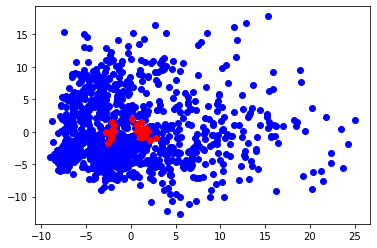

In [118]:
plt.scatter(PC_standard_train[:,0], PC_standard_train[:,1], marker = 'o', c="blue")
plt.scatter(PC_standard_test[:,0], PC_standard_test[:,1], marker = 'o', c="red")

## 4) The Cifar10 Dataset

cifar10 is one of the most widely used datasets for image recognition. It consists of 32*32 color images of 10 different objects ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'). Please take a look at Alex Krizhevsky's home page for more information: https://www.cs.toronto.edu/~kriz/cifar.html.
In this part, we are going to use just one subset of the whole dataset. Please download the file ("data_batch_1") from blackboard and impot it to numpy using the following commands.

In [119]:
def unpickle(file):
    import pickle
    fo = open(file,'rb')
    dictionary = pickle.load(fo, encoding='latin1')
    fo.close()
    return dictionary

data_batch_1 = unpickle("data_batch_1")
data = data_batch_1['data']
labels = np.asarray(data_batch_1['labels'])
LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
'horse', 'ship', 'truck']

### 4.1) Print the dimension of data array. Why is the second dimension different from 32*32?

In [136]:
print(data.shape)
print(labels.size)

(10000, 3072)
10000


In [121]:
print("The second dimension is not 32x32 because the data foor each label is split up between red, blue, and green channel values.")

The second dimension is not 32x32 because the data foor each label is split up between red, blue, and green channel values.


### 4.2) Plot one image from each class using the following function. Make sure that the title of the image is the name of the corresponding object. Hint: You may find np.where command helpful.

In [122]:
# Function that gets an integer and plots the corrsponding column of the data
def cifar10_show(pic_num):
    im = np.reshape(data[pic_num], (32,32,3), order='F')
    plt.figure()
    plt.imshow(np.transpose(im,(1,0,2)))
    plt.title(LABELS[labels[pic_num]])
    plt.show()


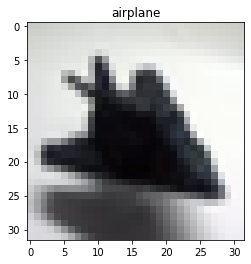

In [143]:
airplane_index = np.where(labels == 0)
cifar10_show(airplane_index[0][0])

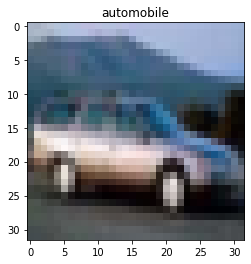

In [145]:
automobile_index = np.where(labels == 1)
cifar10_show(automobile_index[0][0])

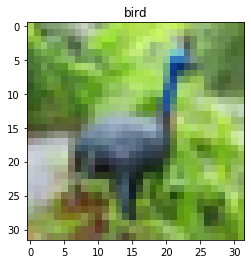

In [146]:
bird_index = np.where(labels == 2)
cifar10_show(bird_index[0][0])

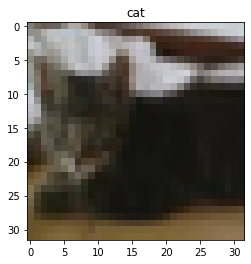

In [147]:
cat_index = np.where(labels == 3)
cifar10_show(cat_index[0][0])

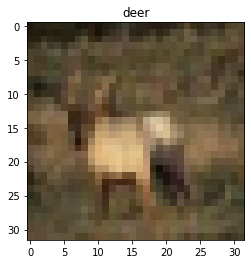

In [149]:
deer_index = np.where(labels == 4)
cifar10_show(deer_index[0][0])

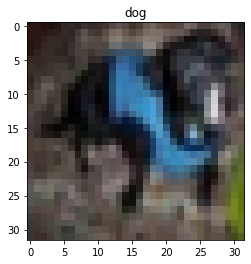

In [150]:
dog_index = np.where(labels == 5)
cifar10_show(dog_index[0][0])

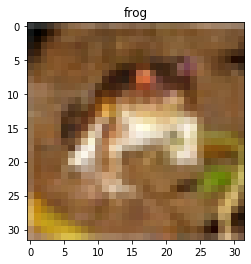

In [151]:
frog_index = np.where(labels == 6)
cifar10_show(frog_index[0][0])

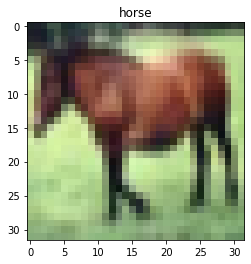

In [152]:
horse_index = np.where(labels == 7)
cifar10_show(horse_index[0][0])

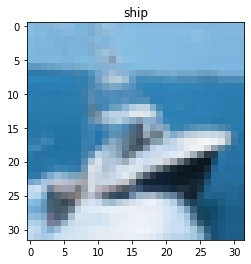

In [153]:
ship_index = np.where(labels == 8)
cifar10_show(ship_index[0][0])

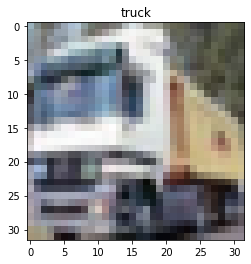

In [154]:
truck_index = np.where(labels == 9)
cifar10_show(truck_index[0][0])

### 4.3) Split the data into 80% training and 20% testing using "train_test_split" command from scikit-learn.

In [155]:
from sklearn.model_selection import train_test_split

data_train, data_test, data_labels_train, data_labels_test = train_test_split(data, labels, test_size = 0.2, random_state = 0)
print(data_test.shape)
print(data_train.shape)

(2000, 3072)
(8000, 3072)


### 4.4) K-Nearest Neighbor Classifier:

Implement k-nearest neighbor classifier for k=1,2. Print the training and test accuracies (it takes a while to run)  (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier).

In [156]:
from sklearn.neighbors import KNeighborsClassifier

training_accuracies = np.zeros(2)
test_accuracies = np.zeros(2)

for k in range(2):
    k_classify = k+1
    
    #create knn classifier 
    knn = KNeighborsClassifier(n_neighbors = k_classify)
    
    #training data fit model
    knn.fit(data_train, data_labels_train)
    
    #compute the accuracy of training 
    training_accuracies[k] = knn.score(data_train, data_labels_train)
    test_accuracies[k] = knn.score(data_test, data_labels_test)

k_vector = np.arange(1,3,1)

In [161]:
print("k=0")
print(training_accuracies[0])
print(test_accuracies[0])
print("\n")
print("k=1")
print(training_accuracies[1])
print(test_accuracies[1])

k=0
1.0
0.2695


k=1
0.592625
0.249


### 4.5) Nearest Class-Mean Classifier:

Implement nearest mean classifier. What are the training and test accuracies? (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html).

In [162]:
nc = NearestCentroid()
nc.fit(data_train, data_labels_train)

training_accuracies = nc.score(data_train, data_labels_train)
test_accuracies = nc.score(data_test, data_labels_test)

print(training_accuracies)
print(test_accuracies)

0.27325
0.277


### 4.6) Gaussian Naive Bayes Classifier

Implement Gaussian naive Bayes classifier and report the training and test accuracies (http://scikit-learn.org/stable/modules/naive_bayes.html).

In [164]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(data_train, data_labels_train)

training_accuracies = gnb.score(data_train, data_labels_train)
test_accuracies = gnb.score(data_test, data_labels_test)

print(training_accuracies)
print(test_accuracies)

0.29025
0.291
